In [1]:
import pandas as pd
import numpy as np 
# import plotly
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
from nltk.probability import FreqDist
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
'''
Issues: 
1. case number = permit number. What is the point of keeping both of them.
2. what is prop_use and existing_use? It is different in API and CSV file
3. last three columns are 2010 Census Neighborhoods, 2010 Census Wards Precincts, and Zipcode, which are different from the API calling
4. what is the point of keeping column 'property_address'
5. Is there a list of work type as a reference? 
'''
# permit_data = 'https://data.baltimorecity.gov/resource/fesm-tgxf.csv'
# house_permit_api = pd.read_csv(permit_data,dtype = 'unicode')

"\nIssues: \n1. case number = permit number. What is the point of keeping both of them.\n2. what is prop_use and existing_use? It is different in API and CSV file\n3. last three columns are 2010 Census Neighborhoods, 2010 Census Wards Precincts, and Zipcode, which are different from the API calling\n4. what is the point of keeping column 'property_address'\n5. Is there a list of work type as a reference? \n"

In [3]:
# house_permit_api.info()

In [4]:
house_permit_from_file = pd.read_csv('Housing_Permits.csv',dtype = 'unicode')
house_permit_from_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634950 entries, 0 to 634949
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   PermitID                     634950 non-null  object
 1   CaseNum                      634950 non-null  object
 2   Block                        634947 non-null  object
 3   Lot                          634947 non-null  object
 4   PropertyAddress              634882 non-null  object
 5   PermitNum                    634950 non-null  object
 6   DateIssue                    634950 non-null  object
 7   PermitDescription            615005 non-null  object
 8   Cost_Est                     468980 non-null  object
 9   DateExpire                   577165 non-null  object
 10  Prop_Use                     582264 non-null  object
 11  Existing_Use                 582436 non-null  object
 12  Neighborhood                 611060 non-null  object
 13  PoliceDistrict

In [5]:
# Question 1 What types of construction permits are people pulling?
# type_of_work = ['install', 'exterior', 'amend','interior']
# for key in type_of_work:
#     if CPTA_house_permit['permitdescription']

# print(house_permit_from_file.columns.tolist())

house_permit_from_file['PermitDescription'] = house_permit_from_file['PermitDescription'].astype(str)
house_permit_from_file['Location'] = house_permit_from_file['Location'].astype(str)
house_permit_from_file = house_permit_from_file[house_permit_from_file['PermitDescription'].notnull()]
# house_permit_from_file.info()

In [6]:
house_permit_from_file.head()

,PermitID,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,20151202163056763B,COM2015-28907,1451,014,1752 N GAY ST,COM2015-28907,03/28/2019,interior and exterior alteration of an existin...,700000.00,03/28/2021,ASM,ASM,BROADWAY EAST,Eastern,12,"1752 N GAY ST\nBaltimore, MD\n(39.310536, -76....",23,148,26956
1,20180215133007957B,DEM2018-50023,4250,041,3401 LABYRINTH RD,DEM2018-50023,03/28/2019,demolition of building/structure(wood)(1) leng...,0.00,09/28/2019,NaN,1-05,CROSS COUNTRY,Northwestern,5,"3401 LABYRINTH RD\nBaltimore, MD\n(39.3669, -7...",58,276,27295
2,200805211220025130,COM2008-14406,3463F,005B,815 BROOKS LANE,COM2008-14406,06/05/2008,new windows (13) 2-new exterior doors ceramic...,12000.00,12/05/2008,SF,VAC,RESERVOIR HILL,Central,7,"815 BROOKS LANE\nBaltimore, MD\n(39.315946, -7...",210,17,27301
3,20191219115630173B,COM2019-88415,1732,042,3126 E BALTIMORE ST,COM2019-88415,12/26/2019,scope of work: interior alterations to include...,15000.00,06/26/2020,1-05,1-05,BALTIMORE-LINWOOD,Southeastern,1,"3126 E BALTIMORE ST\nBaltimore, MD\n(39.292363...",9,118,27935
4,20191226094441660W,COM2019-88825,0503,012,222 W READ ST,COM2019-88825,12/26/2019,amend to add electrical contractor: (original ...,NaN,06/26/2020,3-42,3-42,MID-TOWN BELVEDERE,Central,11,"222 W READ ST\nBaltimore, MD\n(39.30066, -76.6...",165,93,13642


In [7]:
# Since pandas dataframe would store the address of the string, it would always show strings as object. Remeber to use .str to refer to it 
house_permit_from_file['Location_list'] = house_permit_from_file['Location'].str.split()
house_permit_from_file.head()

,PermitID,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes,Location_list
0,20151202163056763B,COM2015-28907,1451,014,1752 N GAY ST,COM2015-28907,03/28/2019,interior and exterior alteration of an existin...,700000.00,03/28/2021,ASM,ASM,BROADWAY EAST,Eastern,12,"1752 N GAY ST\nBaltimore, MD\n(39.310536, -76....",23,148,26956,"[1752, N, GAY, ST, Baltimore,, MD, (39.310536,..."
1,20180215133007957B,DEM2018-50023,4250,041,3401 LABYRINTH RD,DEM2018-50023,03/28/2019,demolition of building/structure(wood)(1) leng...,0.00,09/28/2019,NaN,1-05,CROSS COUNTRY,Northwestern,5,"3401 LABYRINTH RD\nBaltimore, MD\n(39.3669, -7...",58,276,27295,"[3401, LABYRINTH, RD, Baltimore,, MD, (39.3669..."
2,200805211220025130,COM2008-14406,3463F,005B,815 BROOKS LANE,COM2008-14406,06/05/2008,new windows (13) 2-new exterior doors ceramic...,12000.00,12/05/2008,SF,VAC,RESERVOIR HILL,Central,7,"815 BROOKS LANE\nBaltimore, MD\n(39.315946, -7...",210,17,27301,"[815, BROOKS, LANE, Baltimore,, MD, (39.315946..."
3,20191219115630173B,COM2019-88415,1732,042,3126 E BALTIMORE ST,COM2019-88415,12/26/2019,scope of work: interior alterations to include...,15000.00,06/26/2020,1-05,1-05,BALTIMORE-LINWOOD,Southeastern,1,"3126 E BALTIMORE ST\nBaltimore, MD\n(39.292363...",9,118,27935,"[3126, E, BALTIMORE, ST, Baltimore,, MD, (39.2..."
4,20191226094441660W,COM2019-88825,0503,012,222 W READ ST,COM2019-88825,12/26/2019,amend to add electrical contractor: (original ...,NaN,06/26/2020,3-42,3-42,MID-TOWN BELVEDERE,Central,11,"222 W READ ST\nBaltimore, MD\n(39.30066, -76.6...",165,93,13642,"[222, W, READ, ST, Baltimore,, MD, (39.30066,,..."


In [8]:
house_permit_from_file['Length'] = house_permit_from_file['Location_list'].str.len()
house_permit_from_file.head()

,PermitID,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,...,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes,Location_list,Length
0,20151202163056763B,COM2015-28907,1451,014,1752 N GAY ST,COM2015-28907,03/28/2019,interior and exterior alteration of an existin...,700000.00,03/28/2021,...,ASM,BROADWAY EAST,Eastern,12,"1752 N GAY ST\nBaltimore, MD\n(39.310536, -76....",23,148,26956,"[1752, N, GAY, ST, Baltimore,, MD, (39.310536,...",8
1,20180215133007957B,DEM2018-50023,4250,041,3401 LABYRINTH RD,DEM2018-50023,03/28/2019,demolition of building/structure(wood)(1) leng...,0.00,09/28/2019,...,1-05,CROSS COUNTRY,Northwestern,5,"3401 LABYRINTH RD\nBaltimore, MD\n(39.3669, -7...",58,276,27295,"[3401, LABYRINTH, RD, Baltimore,, MD, (39.3669...",7
2,200805211220025130,COM2008-14406,3463F,005B,815 BROOKS LANE,COM2008-14406,06/05/2008,new windows (13) 2-new exterior doors ceramic...,12000.00,12/05/2008,...,VAC,RESERVOIR HILL,Central,7,"815 BROOKS LANE\nBaltimore, MD\n(39.315946, -7...",210,17,27301,"[815, BROOKS, LANE, Baltimore,, MD, (39.315946...",7
3,20191219115630173B,COM2019-88415,1732,042,3126 E BALTIMORE ST,COM2019-88415,12/26/2019,scope of work: interior alterations to include...,15000.00,06/26/2020,...,1-05,BALTIMORE-LINWOOD,Southeastern,1,"3126 E BALTIMORE ST\nBaltimore, MD\n(39.292363...",9,118,27935,"[3126, E, BALTIMORE, ST, Baltimore,, MD, (39.2...",8
4,20191226094441660W,COM2019-88825,0503,012,222 W READ ST,COM2019-88825,12/26/2019,amend to add electrical contractor: (original ...,NaN,06/26/2020,...,3-42,MID-TOWN BELVEDERE,Central,11,"222 W READ ST\nBaltimore, MD\n(39.30066, -76.6...",165,93,13642,"[222, W, READ, ST, Baltimore,, MD, (39.30066,,...",8


In [9]:
# Get latitude and longitude by spliting the string 
house_permit_from_file['lat'] = house_permit_from_file['Location_list'].str[-2].str.strip('(')
house_permit_from_file['long'] = house_permit_from_file['Location_list'].str[-1].str.strip(')')
house_permit_from_file.head()

,PermitID,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,...,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes,Location_list,Length,lat,long
0,20151202163056763B,COM2015-28907,1451,014,1752 N GAY ST,COM2015-28907,03/28/2019,interior and exterior alteration of an existin...,700000.00,03/28/2021,...,Eastern,12,"1752 N GAY ST\nBaltimore, MD\n(39.310536, -76....",23,148,26956,"[1752, N, GAY, ST, Baltimore,, MD, (39.310536,...",8,"39.310536,",-76.586421
1,20180215133007957B,DEM2018-50023,4250,041,3401 LABYRINTH RD,DEM2018-50023,03/28/2019,demolition of building/structure(wood)(1) leng...,0.00,09/28/2019,...,Northwestern,5,"3401 LABYRINTH RD\nBaltimore, MD\n(39.3669, -7...",58,276,27295,"[3401, LABYRINTH, RD, Baltimore,, MD, (39.3669...",7,"39.3669,",-76.698112
2,200805211220025130,COM2008-14406,3463F,005B,815 BROOKS LANE,COM2008-14406,06/05/2008,new windows (13) 2-new exterior doors ceramic...,12000.00,12/05/2008,...,Central,7,"815 BROOKS LANE\nBaltimore, MD\n(39.315946, -7...",210,17,27301,"[815, BROOKS, LANE, Baltimore,, MD, (39.315946...",7,"39.315946,",-76.634808
3,20191219115630173B,COM2019-88415,1732,042,3126 E BALTIMORE ST,COM2019-88415,12/26/2019,scope of work: interior alterations to include...,15000.00,06/26/2020,...,Southeastern,1,"3126 E BALTIMORE ST\nBaltimore, MD\n(39.292363...",9,118,27935,"[3126, E, BALTIMORE, ST, Baltimore,, MD, (39.2...",8,"39.292363,",-76.572507
4,20191226094441660W,COM2019-88825,0503,012,222 W READ ST,COM2019-88825,12/26/2019,amend to add electrical contractor: (original ...,NaN,06/26/2020,...,Central,11,"222 W READ ST\nBaltimore, MD\n(39.30066, -76.6...",165,93,13642,"[222, W, READ, ST, Baltimore,, MD, (39.30066,,...",8,"39.30066,",-76.619321


(-0.5, 399.5, 199.5, -0.5)

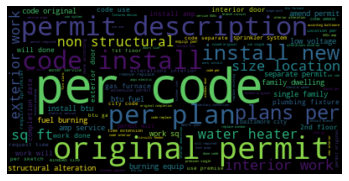

In [10]:
description_list = house_permit_from_file['PermitDescription'].tolist()
description_text = (' '.join(description_list))
wordcloud_description = WordCloud().generate(description_text)
plt.imshow(wordcloud_description, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

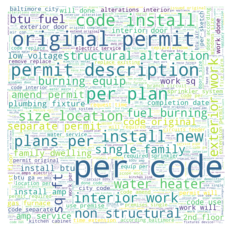

In [14]:
worldcloud_description2 = WordCloud(max_words = 5000,
                                     height = 1000,
                                     width = 1000,
                                     background_color = 'white').generate(description_text)
plt.figure()
plt.imshow(worldcloud_description2, interpolation="bilinear")
plt.axis("off")

In [15]:
house_permit_from_file['lowercase'] = house_permit_from_file['PermitDescription'].str.lower()

In [17]:
nltk.download('punkt')
house_permit_from_file['tokenized_text'] = house_permit_from_file['lowercase'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wzixu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
house_permit_from_file_filter = house_permit_from_file.filter(items = ['PermitID','PropertyAddress','lat','long','lowercase','tokenized_text']).reset_index()
house_permit_from_file_filter.head()

,index,PermitID,PropertyAddress,lat,long,lowercase,tokenized_text
0,0,20151202163056763B,1752 N GAY ST,"39.310536,",-76.586421,interior and exterior alteration of an existin...,"[interior, and, exterior, alteration, of, an, ..."
1,1,20180215133007957B,3401 LABYRINTH RD,"39.3669,",-76.698112,demolition of building/structure(wood)(1) leng...,"[demolition, of, building/structure, (, wood, ..."
2,2,200805211220025130,815 BROOKS LANE,"39.315946,",-76.634808,new windows (13) 2-new exterior doors ceramic...,"[new, windows, (, 13, ), 2-new, exterior, door..."
3,3,20191219115630173B,3126 E BALTIMORE ST,"39.292363,",-76.572507,scope of work: interior alterations to include...,"[scope, of, work, :, interior, alterations, to..."
4,4,20191226094441660W,222 W READ ST,"39.30066,",-76.619321,amend to add electrical contractor: (original ...,"[amend, to, add, electrical, contractor, :, (,..."


In [22]:
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
house_permit_from_file_filter['no_stopwords'] = house_permit_from_file_filter['tokenized_text'].apply(lambda tokenized_list:[word for word in tokenized_list if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wzixu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
house_permit_from_file_filter.head()

,index,PermitID,PropertyAddress,lat,long,lowercase,tokenized_text,no_stopwords
0,0,20151202163056763B,1752 N GAY ST,"39.310536,",-76.586421,interior and exterior alteration of an existin...,"[interior, and, exterior, alteration, of, an, ...","[interior, exterior, alteration, existing, bui..."
1,1,20180215133007957B,3401 LABYRINTH RD,"39.3669,",-76.698112,demolition of building/structure(wood)(1) leng...,"[demolition, of, building/structure, (, wood, ...","[demolition, building/structure, (, wood, ), (..."
2,2,200805211220025130,815 BROOKS LANE,"39.315946,",-76.634808,new windows (13) 2-new exterior doors ceramic...,"[new, windows, (, 13, ), 2-new, exterior, door...","[new, windows, (, 13, ), 2-new, exterior, door..."
3,3,20191219115630173B,3126 E BALTIMORE ST,"39.292363,",-76.572507,scope of work: interior alterations to include...,"[scope, of, work, :, interior, alterations, to...","[scope, work, :, interior, alterations, includ..."
4,4,20191226094441660W,222 W READ ST,"39.30066,",-76.619321,amend to add electrical contractor: (original ...,"[amend, to, add, electrical, contractor, :, (,...","[amend, add, electrical, contractor, :, (, ori..."


In [24]:
# Do the stem of each word
ps = PorterStemmer()

In [25]:
house_permit_from_file_filter['stem_words'] = house_permit_from_file_filter['no_stopwords'].apply(lambda sublist : [ps.stem(word) for word in sublist])

In [36]:
symbol_list = ["!", ")","(", ":", ",",".", "...","-", "|", "'",'"','’','…',"“","”","&","^",";","@","#","$","%","_","+","="]
stop_words.update(symbol_list)
house_permit_from_file_filter['no_symbols'] = house_permit_from_file_filter['stem_words'].apply(lambda x: [word for word in x if word not in stop_words])
house_permit_from_file_filter['no_symbols'] = house_permit_from_file_filter['no_symbols'].apply(lambda x: [word for word in x if not word.isnumeric()])
house_permit_from_file_filter.head()

,index,PermitID,PropertyAddress,lat,long,lowercase,tokenized_text,no_stopwords,stem_words,no_symbols
0,0,20151202163056763B,1752 N GAY ST,"39.310536,",-76.586421,interior and exterior alteration of an existin...,"[interior, and, exterior, alteration, of, an, ...","[interior, exterior, alteration, existing, bui...","[interior, exterior, alter, exist, build, (, a...","[interior, exterior, alter, exist, build, asse..."
1,1,20180215133007957B,3401 LABYRINTH RD,"39.3669,",-76.698112,demolition of building/structure(wood)(1) leng...,"[demolition, of, building/structure, (, wood, ...","[demolition, building/structure, (, wood, ), (...","[demolit, building/structur, (, wood, ), (, 1,...","[demolit, building/structur, wood, length:20, ..."
2,2,200805211220025130,815 BROOKS LANE,"39.315946,",-76.634808,new windows (13) 2-new exterior doors ceramic...,"[new, windows, (, 13, ), 2-new, exterior, door...","[new, windows, (, 13, ), 2-new, exterior, door...","[new, window, (, 13, ), 2-new, exterior, door,...","[new, window, 2-new, exterior, door, ceram, fl..."
3,3,20191219115630173B,3126 E BALTIMORE ST,"39.292363,",-76.572507,scope of work: interior alterations to include...,"[scope, of, work, :, interior, alterations, to...","[scope, work, :, interior, alterations, includ...","[scope, work, :, interior, alter, includ, :, n...","[scope, work, interior, alter, includ, new, ex..."
4,4,20191226094441660W,222 W READ ST,"39.30066,",-76.619321,amend to add electrical contractor: (original ...,"[amend, to, add, electrical, contractor, :, (,...","[amend, add, electrical, contractor, :, (, ori...","[amend, add, electr, contractor, :, (, origin,...","[amend, add, electr, contractor, origin, permi..."


In [37]:
description_list_updated = house_permit_from_file_filter['no_symbols'].tolist()
word_list = []
for sublist in description_list_updated:
    for word in sublist:
        word_list.append(word)

In [38]:
word_frequency_dict = FreqDist(word_list)
df_word_frequency = pd.DataFrame(word_frequency_dict.items(),columns=['word','frequency'])

In [39]:
df_word_frequency = df_word_frequency.sort_values(by = 'frequency', ascending = False).reset_index()

In [41]:
# del df_word_frequency['index']
df_word_frequency.head(50)

,word,frequency
0,per,543178
1,code,433649
2,instal,355066
3,new,266004
4,permit,260004
5,work,227685
6,replac,201182
7,floor,147899
8,interior,147358
9,exist,132929


(-0.5, 1999.5, 1999.5, -0.5)

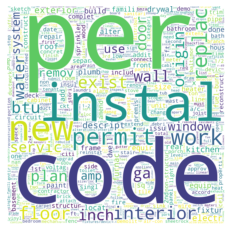

In [42]:
wordcloud_description_updated = WordCloud(max_words = 1000,
                              width = 2000,
                              height = 2000,
                              background_color = 'white'
                             ).generate_from_frequencies(frequencies = word_frequency_dict)
plt.figure()
plt.imshow(wordcloud_description_updated, interpolation='bilinear')
plt.axis('off')

In [43]:
wordcloud_description_updated.to_file('house_permit.png')